# Diabetes Prediction - ML-Model

#### Load preprocessed data, Build, Select, Train and Evaluate Models

In [1]:
from models_config import *
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

print("Libraries Imported ..")

2021-11-25 19:22:18.870840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-25 19:22:18.870882: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Libraries Imported ..


## 1. Load Preprocessed Dataset

In [2]:
DATA_PATH =  "../data/prepared_data.json"
mfcc, labels = load_data(DATA_PATH)

In [3]:
print(f" MFCCs Shape : {mfcc.shape} | Labels Length : {len(labels)}")

 MFCCs Shape : (21312, 44, 13) | Labels Length : 21312


## 2. Data Preparation

In [4]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2, DATA_PATH)
pd.DataFrame({"Training": [X_train.shape, y_train.shape], 
              "Validation":[X_validation.shape, y_validation.shape], 
              "Testing":[X_test.shape, y_test.shape]}, index=['Features', 'Target'])

,Training,Validation,Testing
Features,"(12787, 44, 13, 1)","(3197, 44, 13, 1)","(5328, 44, 13, 1)"
Target,"(12787,)","(3197,)","(5328,)"


## 3. Build Model

In [5]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_ann_model(input_shape)

2021-11-25 19:23:22.694147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-25 19:23:22.694275: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-25 19:23:22.694365: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-9QBALMC): /proc/driver/nvidia/version does not exist
2021-11-25 19:23:22.695184: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 4. Compule Model

In [6]:
lr, loss, metrics = 0.0001, 'sparse_categorical_crossentropy', 'accuracy'
model = compule_model(lr, loss, metrics, model)

## 5.  Model Summary

In [7]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 572)               0         
                                                                 
 dense (Dense)               (None, 512)               293376    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

## 6. Train Model

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
400/400 [==============================] - 4s 7ms/step - loss: 31.2313 - accuracy: 0.1026 - val_loss: 3.2057 - val_accuracy: 0.1067
Epoch 2/30
400/400 [==============================] - 2s 6ms/step - loss: 4.2078 - accuracy: 0.1051 - val_loss: 3.1860 - val_accuracy: 0.1067
Epoch 3/30
400/400 [==============================] - 2s 5ms/step - loss: 3.5851 - accuracy: 0.0999 - val_loss: 3.1745 - val_accuracy: 0.1067
Epoch 4/30
400/400 [==============================] - 2s 5ms/step - loss: 3.3242 - accuracy: 0.1026 - val_loss: 3.1639 - val_accuracy: 0.1067
Epoch 5/30
400/400 [==============================] - 2s 6ms/step - loss: 3.2871 - accuracy: 0.1014 - val_loss: 3.1529 - val_accuracy: 0.1067
Epoch 6/30
400/400 [==============================] - 2s 5ms/step - loss: 3.2333 - accuracy: 0.1019 - val_loss: 3.1411 - val_accuracy: 0.1067
Epoch 7/30
400/400 [==============================] - 2s 5ms/step - loss: 3.1788 - accuracy: 0.1015 - val_loss: 3.1284 - val_accuracy: 0.1067
Epoch

## 7. Plot Model Training History

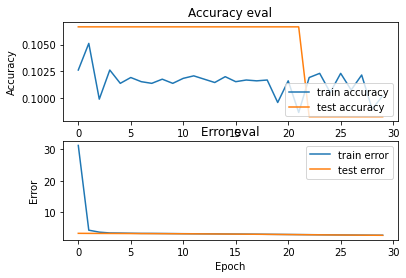

<Figure size 1152x576 with 0 Axes>

In [9]:
plot_history(history)

## 8.  Evaluate Model on test set

In [27]:
model_loss_acc(model, X_train, y_train, X_test, y_test, X_validation, y_validation)

167/167 - 0s - loss: 2.5752 - accuracy: 0.1019 - 337ms/epoch - 2ms/step


,Training,Validation,Testing
Accuracy,10.23,9.82,0.101914
Loss,257.52,257.54,257.520000


## 9. Prediction

In [11]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: 0, Predicted label: [2]


#####################################################################################################

#####################################################################################################

#####################################################################################################